In [1]:
import pandas as pd
import os
import random
import collections
from collections import Counter
import matplotlib.pyplot as plt
from random import sample 

d = os.path.dirname(os.getcwd())
print (d)


/home/lhoang2/Notebooks/CONSORT2


In [2]:
import matplotlib.pyplot as plt

#SNORKEL DATA
snorkel_data_file = "/efs/CONSORT2/data/snorkel_data/all_data_SNORKEL_RESULTS_keywords_sectionheaders_sentencesimilarity_threshold08_CLEANED_06072021.csv"
snorkel_data_df = pd.read_csv(snorkel_data_file)
print ("Number of instances of Snorkel data: ", len(snorkel_data_df))
display(snorkel_data_df.tail(5))

Number of instances of Snorkel data:  551936


,PMID,sid,text,section_hierarchy,CONSORT_item
551931,26869758,82,"the means of crt, iop, age and, transaminase e...","['statistical analysis', 'patients and methods']",0
551932,26869758,83,"ocular signs, aes, fluorescein and lissamine d...","['statistical analysis', 'patients and methods']",0
551933,26869758,84,the concentration of both drugs and amfenac wa...,"['statistical analysis', 'patients and methods']",12a
551934,26869758,85,"in all analyses, a p-value of <0.05 (two-taile...","['statistical analysis', 'patients and methods']",12a
551935,26869758,86,all statistical analyses were conducted using ...,"['statistical analysis', 'patients and methods']",12a


In [16]:
# def proceed_label(item):
#     item = str(item)
#     item = item.replace("[","")
#     item = item.replace("]","")
#     item = item.replace("'","")
#     return item

# #remove unused columns 
# snorkel_data_df = snorkel_data_df[["PMID","sid","text","section_hierarchy","prediction_by_threshold_0.8"]]
# snorkel_data_df.columns = ["PMID","sid","text","section_hierarchy","CONSORT_item"]


# snorkel_data_df['PMID'] = snorkel_data_df['PMID'].astype(int).astype(str)
# snorkel_data_df['sid'] = snorkel_data_df['sid'].astype(int).astype(str)
# print ("Before removing: ", len(snorkel_data_df))

# remove_index = []
# for index, row in snorkel_data_df.iterrows():
#     if (index % 1000 == 0): 
#         print (index)
#     sentence = row["text"]
#     section_hierarchy = row["section_hierarchy"]
#     snorkel_data_df.at[index, "CONSORT_item"] = proceed_label(row["CONSORT_item"])
    
#     # remove header sentences
#     if sentence in section_hierarchy:
#         remove_index.append(index)
#     # remove tables/figures description
#     elif (("Table" in sentence) or ("Figure" in sentence)) and ("shown in" in sentence):
#         remove_index.append(index)
#     # remove sentences not belong to Methods
#     elif ("method" not in section_hierarchy):
#         remove_index.append(index)
#     elif ("abstract" in section_hierarchy) or ("abstracts" in section_hierarchy):
#         remove_index.append(index)
# snorkel_data_df.drop(remove_index, inplace = True)
# print ("After removing: ", len(snorkel_data_df))
# display(snorkel_data_df.head(50))

Before removing:  599166
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155

Labels distribution:  {'11b': 3, '8a': 7, '12b': 49, '7b': 124, '9': 274, '11a': 525, '4b': 740, '10': 1785, '8b': 2915, '3a': 3932, '7a': 6674, '5': 11415, '4a': 17182, '6a': 24104, '12a': 45353, '0': 436854}


<BarContainer object of 16 artists>

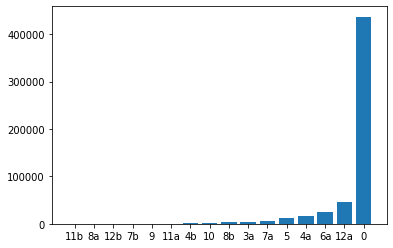

In [3]:
label_list = (snorkel_data_df["CONSORT_item"]).tolist()
label_distribution = dict(Counter(label_list))
label_distribution = (dict(sorted(label_distribution.items(), key=lambda item: item[1])))
print ("Labels distribution: ", label_distribution)
keys = label_distribution.keys()
values = label_distribution.values()
plt.bar(keys, values)

In [4]:
# list_of_limited_labels = ['5', '6a', '7a', '12a', '0','None'] # all agreed 
# list_of_limited_labels = ['4b', '10', '8b', '11a', '3a', '7a', '4a', '5', '6a', '12a', 'None', '0'] #majority vote
# list_of_limited_labels = ['11b', '12b', '10', '11a', '7b', '8b', '4b', '7a', '3a', '4a', '5', '12a', '6a', '0'] #snorkel prediction
list_of_limited_labels = ['9','10', '8b', '11a', '3a', '7a', '4a', '5', '6a', '12a', '0', '4b']

# # label"None"
label_0_df = snorkel_data_df[(snorkel_data_df['CONSORT_item'] == "0")]
display(label_0_df.head(5))
label_0_5000_df = label_0_df.sample(n = 500)

# label"7a"
label_7a_df = snorkel_data_df[(snorkel_data_df['CONSORT_item'] == "7a")]
label_7a_5000_df = label_7a_df.sample(n = 500)

# label"9"
label_9_df = snorkel_data_df[(snorkel_data_df['CONSORT_item'] == "9")]
label_9_5000_df = label_9_df.sample(n = 274)

# label"11b"
# label_11b_df = snorkel_data_df[snorkel_data_df['CONSORT_item'] == "11b"]
# label_11b_5000_df = label_11b_df.sample(n = 500)

# label"11a"
label_11a_df = snorkel_data_df[snorkel_data_df['CONSORT_item'] == "11a"]
label_11a_5000_df = label_11a_df.sample(n = 500)


# label"4b"--5000 instances
label_4b_df = snorkel_data_df[snorkel_data_df['CONSORT_item'] == "4b"]
label_4b_5000_df = label_4b_df.sample(n = 500)

# label"3a"--5000 instances
label_3a_df = snorkel_data_df[snorkel_data_df['CONSORT_item'] == "3a"]
label_3a_5000_df = label_3a_df.sample(n = 500)


# # label"5"--5000 instances
label_5_df = snorkel_data_df.loc[snorkel_data_df['CONSORT_item'] == "5"]
label_5_5000_df = label_5_df.sample(n = 500)

# label"4a"--5000 instances
label_4a_df = snorkel_data_df.loc[snorkel_data_df['CONSORT_item'] == "4a"]
label_4a_5000_df = label_4a_df.sample(n = 500)
# label_4a_5000_df =label_4a_df.nlargest(200,'predicted_score')

# label"6a"--5000 instances
label_6a_df = snorkel_data_df.loc[snorkel_data_df['CONSORT_item'] == "6a"]
label_6a_5000_df = label_6a_df.sample(n = 500)
# label_6a_5000_df =label_6a_df.nlargest(200,'predicted_score')

# label"12a"--5000 instances
label_12a_df = snorkel_data_df.loc[snorkel_data_df['CONSORT_item'] == "12a"]
label_12a_5000_df = label_12a_df.sample(n = 500)
# label_12a_5000_df =label_12a_df.nlargest(200,'predicted_score')

# # label"7b"--5000 instances
# label_7b_df = snorkel_data_df.loc[snorkel_data_df['CONSORT_item'] == "7b"]
# label_7b_5000_df = label_7b_df.sample(n = 500)

# label"8b"--5000 instances
label_8b_df = snorkel_data_df.loc[snorkel_data_df['CONSORT_item'] == "8b"]
label_8b_5000_df = label_8b_df.sample(n = 500)

# label"12b"--5000 instances
# label_12b_df = snorkel_data_df.loc[snorkel_data_df['CONSORT_item'] == "12b"]
# label_12b_5000_df = label_12b_df.sample(n = 500)

# # label"10"--5000 instances
label_10_df = snorkel_data_df.loc[snorkel_data_df['CONSORT_item'] == "10"]
label_10_5000_df = label_10_df.sample(n=500)
# label_10_5000_df =label_10_df.nlargest(200,'predicted_score')

# all other labels same numbers of instances
remaining_df = snorkel_data_df.loc[~snorkel_data_df['CONSORT_item'].isin(list_of_limited_labels)]
                       
snorkel_data_df = remaining_df.append(label_0_5000_df)
snorkel_data_df = snorkel_data_df.append(label_7a_5000_df)
snorkel_data_df = snorkel_data_df.append(label_9_5000_df)
snorkel_data_df = snorkel_data_df.append(label_11a_5000_df)
snorkel_data_df = snorkel_data_df.append(label_4b_5000_df)
snorkel_data_df = snorkel_data_df.append(label_3a_5000_df)
snorkel_data_df = snorkel_data_df.append(label_5_5000_df)
snorkel_data_df = snorkel_data_df.append(label_4a_5000_df)
snorkel_data_df = snorkel_data_df.append(label_12a_5000_df)
# snorkel_data_df = snorkel_data_df.append(label_7b_5000_df)
snorkel_data_df = snorkel_data_df.append(label_6a_5000_df)
snorkel_data_df = snorkel_data_df.append(label_8b_5000_df)
# snorkel_data_df = snorkel_data_df.append(label_12b_5000_df)
snorkel_data_df = snorkel_data_df.append(label_10_5000_df)

snorkel_data_df = snorkel_data_df.reset_index(drop = True)
print ("Number of instances after sampling: ", snorkel_data_df.shape[0])

,PMID,sid,text,section_hierarchy,CONSORT_item
0,33062915,42,this study was a randomized clinical trial per...,['2. materials and methods'],0
2,33062915,44,128 eligible women who were assigned for fet p...,['2. materials and methods'],0
3,33062915,45,they were allocated into two groups randomly a...,['2. materials and methods'],0
4,33062915,47,"first, all patients underwent transvaginal ult...",['2. materials and methods'],0
6,33062915,49,when the optimal endometrial thickness (>8 mm)...,['2. materials and methods'],0


Number of instances after sampling:  5957


Labels distribution:  {'11b': 3, '8a': 7, '12b': 49, '7b': 124, '9': 274, '0': 500, '7a': 500, '11a': 500, '4b': 500, '3a': 500, '5': 500, '4a': 500, '12a': 500, '6a': 500, '8b': 500, '10': 500}


<BarContainer object of 16 artists>

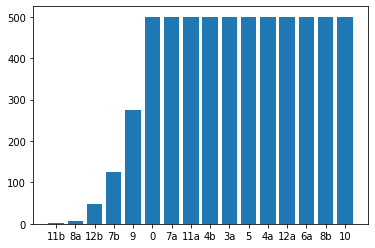

In [5]:
label_list = (snorkel_data_df["CONSORT_item"]).tolist()
label_distribution = dict(Counter(label_list))
label_distribution = (dict(sorted(label_distribution.items(), key=lambda item: item[1])))
print ("Labels distribution: ", label_distribution)
keys = label_distribution.keys()
values = label_distribution.values()
plt.bar(keys, values)

In [6]:
def proceed_label(item):
    item = item.replace("[","")
    item = item.replace("]","")
    item = item.replace("'","")
    item = item.replace(" ","")
    item = item.split(",")
    return item

for index, item in snorkel_data_df.iterrows():
    label = item["CONSORT_item"]
    label = proceed_label(label)
    snorkel_data_df.at[index,"CONSORT_item"] = label
    
    
print (len(snorkel_data_df))
display(snorkel_data_df.tail(10))
snorkel_data_df.to_csv("/efs/CONSORT2/data/classification_data/train_SNORKEL_500instancesPerLabel_06082021.csv", index = False)

5957


,PMID,sid,text,section_hierarchy,CONSORT_item
5947,30998227,49,a 1:1 randomized allocation plan for 200 subje...,"['randomization and dietary intervention', 'me...",[10]
5948,28485320,45,investigator and clinical staff were blinded t...,"['patients and randomization', 'methods']",[10]
5949,30363994,81,each patient was assigned a randomization numb...,"['2.3. randomization and blinding', '2. materi...",[10]
5950,26458872,109,the allocation will be performed by an indepen...,['assessment of eligibility and randomization'...,[10]
5951,26956164,63,"reviews were given a unique code, which along ...","['randomisation', 'methods']",[10]
5952,21794162,93,"after a client had tested hiv positive, the te...","['randomization and masking', 'methods']",[10]
5953,28673265,46,the randomization code can be broken at any ti...,['randomization and procedures for breakage of...,[10]
5954,33225080,86,"patients, ivf clinic staff, embryologists and ...","['randomisation and allocation', 'material and...",[10]
5955,31671873,58,randomization was conducted by a research assi...,"['2.2. enrollment, randomization, and blinding...",[10]
5956,21641867,68,"the minimisation factors were hospital, who pe...","['randomisation and masking', 'methods']",[10]


In [25]:
snorkel_data_df = pd.read_csv("/efs/CONSORT2/data/classification_data/train_SNORKEL_200instancesPerLabel_06072021.csv")
print (len(snorkel_data_df))
rare_labels = ['11b','8a']
label_11b_analysis = snorkel_data_df[snorkel_data_df["CONSORT_item"].str.contains('11b')]
label_8a_analysis = snorkel_data_df[snorkel_data_df["CONSORT_item"].str.contains('8a')]

examples_for_analysis = pd.concat([label_11b_analysis,label_8a_analysis])
indexes = examples_for_analysis.index

snorkel_data_df.drop(examples_for_analysis.index, inplace = True)
# examples_for_analysis = snorkel_data_df.sample(n=300)
display(examples_for_analysis)
print (len(snorkel_data_df))

sampled_labels = ['12b', '7b','0', '7a', '9', '11a', 
                  '4b', '3a', '5', '4a', '12a', '6a', '8b', '10']

for label in sampled_labels:
    label_df = snorkel_data_df.loc[snorkel_data_df['CONSORT_item'].str.contains(label)]
    label_df_sampled = label_df.sample(n=22)
    
    examples_for_analysis = examples_for_analysis.append(label_df_sampled)

print (len(examples_for_analysis))

2583


,PMID,sid,text,section_hierarchy,CONSORT_item
26,27266702,65,both chinese herb and placebo capsules were id...,"['supplement administration', 'methods']",['11b']
45,27858723,93,"furthermore, atomoxetine and placebo capsules ...","['blinding', 'methods']",['11b']
111,23185280,57,the bags containing amantadine and placebo wer...,"['2. dosage schedule', 'methods']",['11b']
2,22381072,69,a blocked random allocation sequence was centr...,"['random allocation sequence', 'methods']",['8a']
73,33040002,100,the allocation sequence was attained using com...,"['sequence generation', 'allocation', 'methods']",['8a']
119,22859902,80,computer-generated random allocations sequence...,"['sequence generation', 'materials & methods']",['8a']
125,25515666,122,the random allocation schedule will be prepare...,"['sequence generation', 'methods/design']",['8a']
135,33020101,117,random allocation will be generated by an inde...,"['stage 1', 'sequence generation and allocatio...",['8a']
136,33020101,126,random allocation will be generated by an inde...,"['stage 2', 'sequence generation and allocatio...",['8a']
153,23028241,84,computer generated random allocations sequence...,"['sequence generation', 'materials and methods']",['8a']


2573
318


In [26]:
from sklearn.utils import shuffle
examples_for_analysis = shuffle(examples_for_analysis)
examples_for_analysis.to_csv("300_examples_for_analysis_withSnorkelPrediction.csv", index = False)

In [27]:
examples_for_analysis_noSnorkelPrediction = examples_for_analysis.drop(["CONSORT_item"],axis=1)
display(examples_for_analysis_noSnorkelPrediction)


,PMID,sid,text,section_hierarchy
1623,27047809,40,from 373 patients referring to studied centers...,['3. patients and methods']
2024,21654869,131,the otc-rx self-efficacy scale is a 12-item in...,"['outcome measures', 'methods']"
573,25879460,70,the planned sample size of 412 patients was ba...,"['statistical analysis', 'methods']"
2369,25298894,62,both the active treatment (topical menthol gel...,"['2.3. randomization and blinding', '2. methods']"
2346,29550766,57,randomisation was stratified according to prev...,"['treatment and randomisation', 'methods']"
...,...,...,...,...
1077,27909031,56,this study was carried out on 96 hands belongi...,"['setting', 'materials and methods']"
2345,22561352,102,participants were randomly allocated (allocati...,"['randomisation', 'methods']"
1355,23869233,37,participants were followed in a double-blind c...,"['experimental design', 'materials and methods']"
1218,24393134,45,"this randomised, incomplete block, three-perio...","['study design and treatment', 'methods']"


In [28]:
examples_for_analysis_noSnorkelPrediction.to_csv("300_examples_for_analysis_hiddenSnorkelPrediction.csv", index = False)

In [7]:
data_file = "300_examples_for_analysis_hiddenSnorkelPrediction.csv"
data_df = pd.read_csv(data_file)
display(data_df)


,PMID,sid,text,section_hierarchy
0,27047809,40,from 373 patients referring to studied centers...,['3. patients and methods']
1,21654869,131,the otc-rx self-efficacy scale is a 12-item in...,"['outcome measures', 'methods']"
2,25879460,70,the planned sample size of 412 patients was ba...,"['statistical analysis', 'methods']"
3,25298894,62,both the active treatment (topical menthol gel...,"['2.3. randomization and blinding', '2. methods']"
4,29550766,57,randomisation was stratified according to prev...,"['treatment and randomisation', 'methods']"
...,...,...,...,...
313,27909031,56,this study was carried out on 96 hands belongi...,"['setting', 'materials and methods']"
314,22561352,102,participants were randomly allocated (allocati...,"['randomisation', 'methods']"
315,23869233,37,participants were followed in a double-blind c...,"['experimental design', 'materials and methods']"
316,24393134,45,"this randomised, incomplete block, three-perio...","['study design and treatment', 'methods']"
